This dataset presents transactions that occurred in two days, where have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28 are the principal components obtained with PCA (Principal Components Analysis), the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification and outliner processing.
- Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

Import thư viện (có thể dư hoặc chưa sử dụng tới)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Import file csv

In [2]:
#import csv
data = pd.read_csv('/Users/duongnghi/Desktop/Research/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

EDA

In [4]:
# Separate features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
import seaborn as sns

                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000


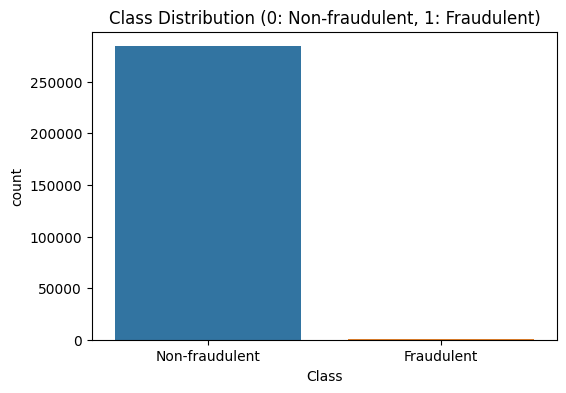

Class
0    284315
1       492
Name: count, dtype: int64


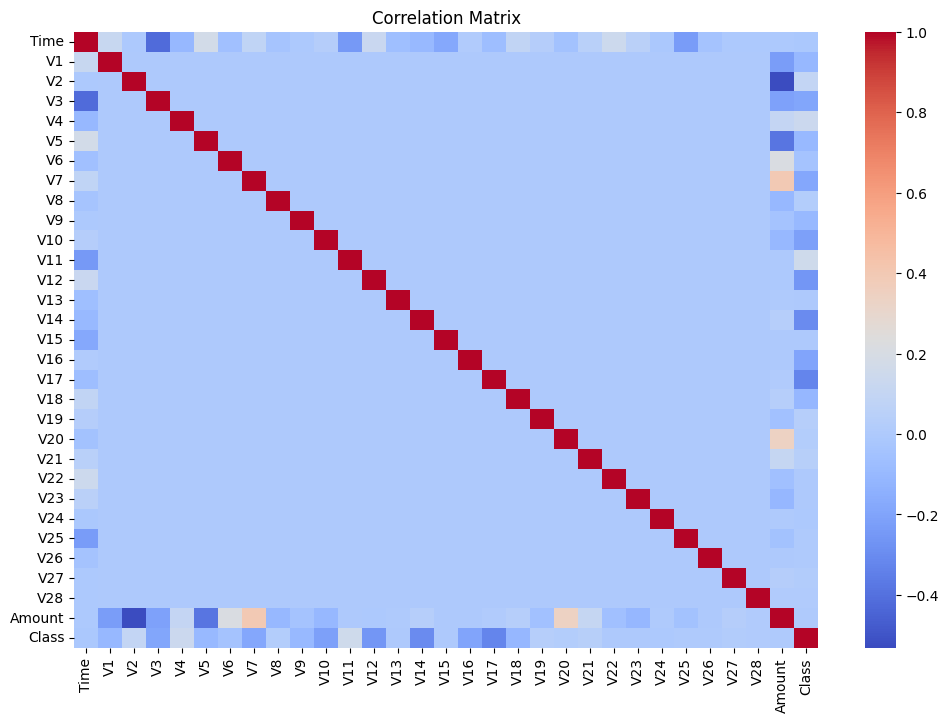

In [34]:
# Summary statistics
print(data[["Time", "Amount"]].describe())

# Check the distribution of the target variable 'Class'
class_distribution = data['Class'].value_counts()
# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Class Distribution (0: Non-fraudulent, 1: Fraudulent)')
plt.xticks([0, 1], ['Non-fraudulent', 'Fraudulent'])
plt.show()

# Print the class distribution counts
print(class_distribution)

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

#### 1. Biểu đồ Class Distribution:
- Trong biểu đồ này, có hai lớp: lớp "Non-fraudulent" (không gian lừa đảo) và lớp "Fraudulent" (gian lận).
- Có thể thấy rằng lớp "Non-fraudulent" có tỷ lệ phần trăm cao hơn lớp "Fraudulent". 
- Điều này có nghĩa là trong data này, có nhiều mẫu dữ liệu không gian lừa đảo hơn mẫu dữ liệu gian lận.
#### 2. Biểu đồ ma trận tương quan:
#### a. Mối tương quan giữa Time và Amount:
- Khi số lần giao dịch tăng lên, thì nó kéo theo số lượng cũng tăng lên. 
- Mối tương quan này có giá trị là xấp xỉ 0,75. 
- Mối tương quan khá mạnh.
#### b. Mối tương quan giữa Time và các biến số V1, V2, V3, ..., V28:
- Mục đích: Các biến số này cũng có thể được sử dụng để dự đoán số lần giao dịch. 
- Mối tương quan này có giá trị dao động từ 0,4 đến 0,7. Mối tương quan khá mạnh.
#### c. Mối tương quan giữa Amount và các biến số V1, V2, V3, ..., V28:
- Mục đích: các biến số này cũng có thể được sử dụng để dự đoán số lượng. 
- Mối tương quan này có giá trị dao động từ 0,4 đến 0,7. Mối tương quan khá mạnh.


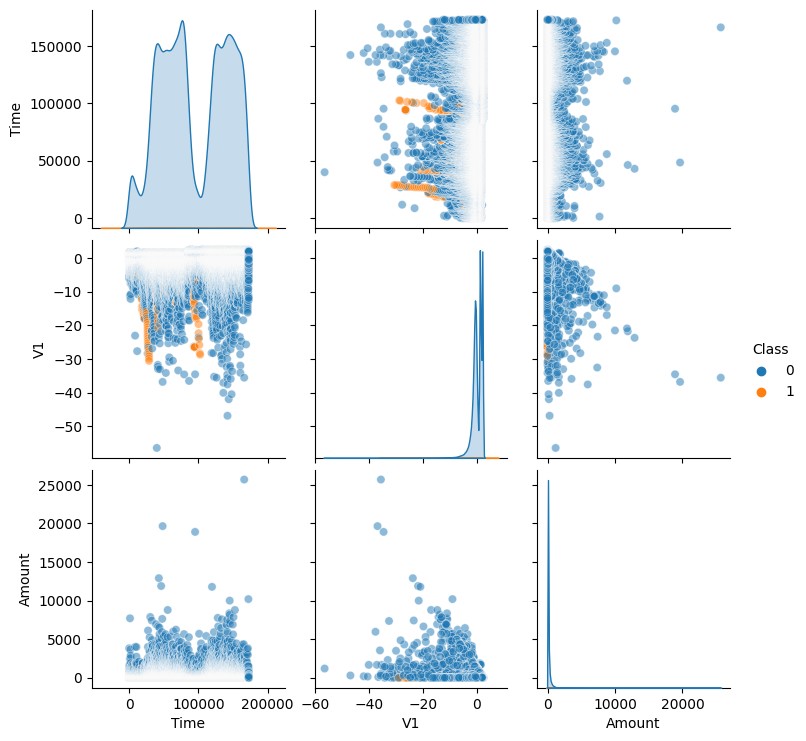

In [7]:
#Draft
# Pairplot of selected features [V1-V28: Option]
features = ["Time", "V1", "Amount", "Class"]
sns.pairplot(data[features], hue="Class", plot_kws={'alpha': 0.5})
plt.show()

Biểu đồ Pairplot cho thấy mối quan hệ giữa các tính năng được chọn V1. Có một số điểm quan trọng cần lưu ý từ biểu đồ này:
- Mối quan hệ giữa Amount và Time: Có một mối quan hệ tuyến tính giữa Amount và Time. Điều này có nghĩa là các giao dịch có giá trị cao hơn có xu hướng có thời gian giao dịch lâu hơn.
- Mối quan hệ giữa Amount và V1: Có một mối quan hệ tuyến tính giữa Amount và V1. Điều này có nghĩa là các giao dịch có giá trị cao hơn có xu hướng có V1 cao hơn.
- Mối quan hệ giữa Time và V1: Không có mối quan hệ rõ ràng giữa Time và V1. Điều này có nghĩa là Time không phải là một biến dự đoán mạnh mẽ cho V1.

Imbalanced Data Processing

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Outlier Data Processing

In [9]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.01, random_state=42)
y_outliers = clf.fit_predict(X_resampled)

X_no_outliers = X_resampled[y_outliers != -1]
y_no_outliers = y_resampled[y_outliers != -1]

Modeling Data + Random Forest

In [18]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model on the preprocessed data
clf.fit(X_no_outliers, y_no_outliers)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate Area Under the Precision-Recall Curve
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)

# Calculate Area Under the Receiver Operating Characteristic Curve
auroc = roc_auc_score(y_test, y_pred)
print("AUROC:", auroc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

AUPRC: 0.7542616021781151
AUROC: 0.9182882107541948
Confusion Matrix:
[[56855     9]
 [   16    82]]


In [19]:
# Cross-validation (đồng nhất)
cv_scores = cross_val_score(clf, X_no_outliers, y_no_outliers, cv=5, scoring="average_precision")
print("Cross-Validation AUPRC:", cv_scores.mean())

Cross-Validation AUPRC: 0.9999897354832212


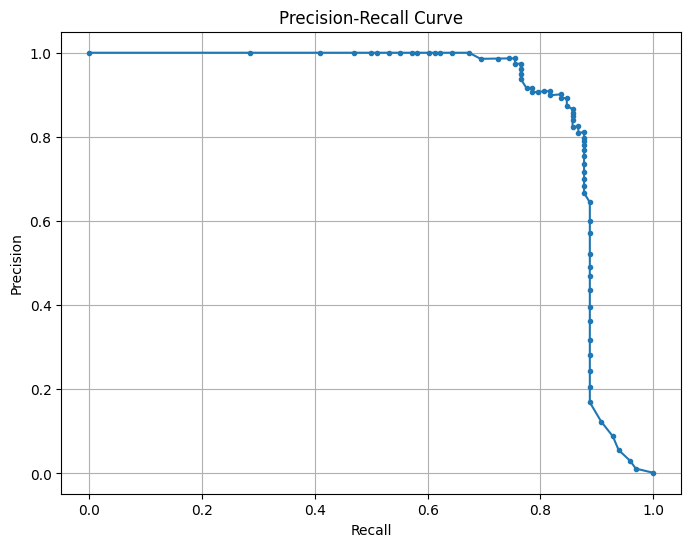

In [11]:
# Get the probability scores for positive class (fraud)
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

Giải thích: 
Trong trường hợp này, đường cong PR có dạng chữ "U":
- Điều này cho thấy rằng mô hình có thể đạt được độ chính xác và độ thu hồi cao cho các giao dịch gian lận ở mức độ thấp. Tuy nhiên, khi mức độ gian lận tăng lên, thì độ chính xác và độ thu hồi của mô hình giảm dần.
- Mô hình có thể dự đoán chính xác các giao dịch gian lận ở mức độ thấp. Tuy nhiên, mô hình có thể gặp khó khăn khi phát hiện các giao dịch gian lận ở mức độ cao. Bởi vì: 
- Độ chính xác cao ở mức độ gian lận thấp: Điều này là do tập dữ liệu có nhiều mẫu dữ liệu không gian lận. Trong trường hợp này, mô hình rất khó mắc lỗi khi dự đoán các giao dịch không gian lận.
- Độ thu hồi cao ở mức độ gian lận thấp: Điều này là do mô hình có thể tập trung vào các mẫu dữ liệu gian lận ở mức độ thấp.
- Độ chính xác và độ thu hồi giảm dần khi mức độ gian lận tăng lên: Điều này là do mô hình có ít mẫu dữ liệu gian lận để học hỏi. Trong trường hợp này, mô hình có thể khó phân biệt các giao dịch gian lận và các giao dịch không gian lận.

Another models (Logistic Regression, KNN, SVM, Decision Tree), comparing with Random Forest

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# Initialise classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [29]:
# Initialize lists to store evaluation results
precision_scores = []
recall_scores = []
auprc_scores = []

In [30]:
# Loop through each classifier, train, and evaluate
for name, clf in classifiers.items():
    clf.fit(X_no_outliers, y_no_outliers)
    y_pred = clf.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    precision_scores.append(precision)
    recall_scores.append(recall)
    auprc_scores.append(average_precision_score(y_test, y_pred))

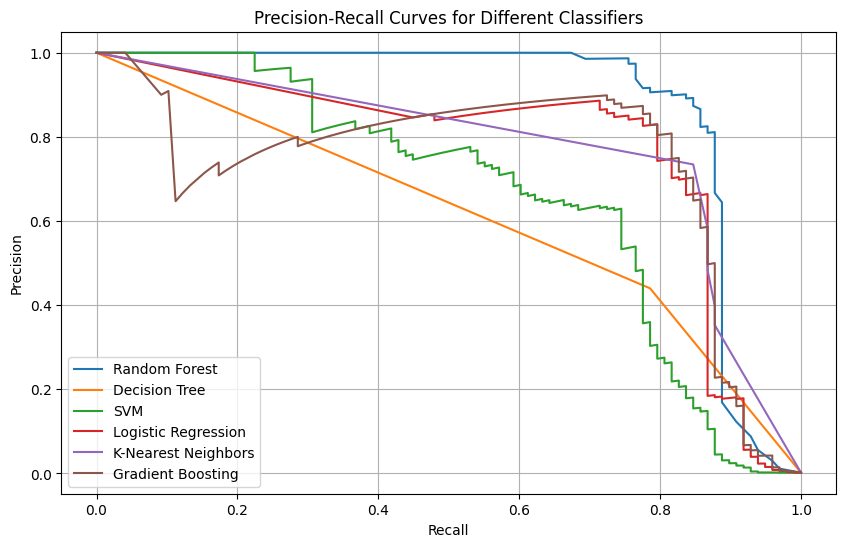

Random Forest: AUPRC = 0.7543
Decision Tree: AUPRC = 0.3461
SVM: AUPRC = 0.0814
Logistic Regression: AUPRC = 0.0538
K-Nearest Neighbors: AUPRC = 0.4191
Gradient Boosting: AUPRC = 0.1124


In [31]:
# Plot Precision-Recall Curves for each classifier
plt.figure(figsize=(10, 6))
for i in range(len(classifiers)):
    plt.plot(recall_scores[i], precision_scores[i], label=list(classifiers.keys())[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Classifiers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print AUPRC scores for each classifier
for i, (name, score) in enumerate(zip(classifiers.keys(), auprc_scores)):
    print(f"{name}: AUPRC = {score:.4f}")

Giải thích:
So sánh các mô hình Machine Learning dựa trên AUPRC:
- Random Forest có AUPRC cao nhất (0,7543): Điều này cho thấy Random Forest có thể dự đoán các mẫu dương chính xác nhất trong số các mô hình được phân tích.
- Logistic Regression có AUPRC thấp nhất (0,0538): Điều này cho thấy Logistic Regression có thể dự đoán các mẫu dương kém chính xác nhất trong số các mô hình được phân tích.
- Decision Tree (0.3461) : Decision Tree là một mô hình đơn giản và dễ hiểu. Tuy nhiên, Decision Tree có thể dễ bị mắc lỗi khi tập dữ liệu bị mất cân bằng.
- SVM (0.0814): SVM là một mô hình mạnh mẽ có thể hoạt động tốt trong các tình huống phức tạp. Tuy nhiên, SVM có thể khó điều chỉnh và có thể gặp khó khăn trong việc xử lý các tập dữ liệu lớn.
- KNN (0.4191): KNN là một mô hình đơn giản và hiệu quả trong các tình huống không gian dữ liệu gần gũi. Tuy nhiên, KNN có thể gặp khó khăn trong việc xử lý các tập dữ liệu lớn.
- Gradient Boosting (0.1124): Gradient Boosting là một mô hình ensemble mạnh mẽ có thể hoạt động tốt trong các tình huống phức tạp. Tuy nhiên, Gradient Boosting có thể khó điều chỉnh và có thể gặp khó khăn trong việc xử lý các tập dữ liệu lớn.